# 베스트 모델 만들기 - 와인 사례

## 이진 분류

### 베스트 모델 업데이트하기 - 자동 중단, 그래프로 확인

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df_pre = pd.read_csv('../data/wine.csv', header=None)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [11]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
]) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [14]:
modelpath = MODEL_DIR + "final{epoch:03d}-{val_loss:.4f}.hdf5"

checkpointer_callback = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)

In [15]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [16]:
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500,
                    verbose=0, callbacks=[early_stopping_callback, checkpointer_callback])


Epoch 00001: val_loss improved from inf to 0.40561, saving model to ./model/final001-0.4056.hdf5

Epoch 00002: val_loss improved from 0.40561 to 0.29691, saving model to ./model/final002-0.2969.hdf5

Epoch 00003: val_loss improved from 0.29691 to 0.25690, saving model to ./model/final003-0.2569.hdf5

Epoch 00004: val_loss improved from 0.25690 to 0.22400, saving model to ./model/final004-0.2240.hdf5

Epoch 00005: val_loss improved from 0.22400 to 0.20963, saving model to ./model/final005-0.2096.hdf5

Epoch 00006: val_loss improved from 0.20963 to 0.19811, saving model to ./model/final006-0.1981.hdf5

Epoch 00007: val_loss improved from 0.19811 to 0.19366, saving model to ./model/final007-0.1937.hdf5

Epoch 00008: val_loss improved from 0.19366 to 0.19116, saving model to ./model/final008-0.1912.hdf5

Epoch 00009: val_loss improved from 0.19116 to 0.18554, saving model to ./model/final009-0.1855.hdf5

Epoch 00010: val_loss improved from 0.18554 to 0.18145, saving model to ./model/final


Epoch 00106: val_loss improved from 0.06644 to 0.06566, saving model to ./model/final106-0.0657.hdf5

Epoch 00107: val_loss did not improve from 0.06566

Epoch 00108: val_loss did not improve from 0.06566

Epoch 00109: val_loss did not improve from 0.06566

Epoch 00110: val_loss improved from 0.06566 to 0.06432, saving model to ./model/final110-0.0643.hdf5

Epoch 00111: val_loss improved from 0.06432 to 0.06373, saving model to ./model/final111-0.0637.hdf5

Epoch 00112: val_loss did not improve from 0.06373

Epoch 00113: val_loss improved from 0.06373 to 0.06373, saving model to ./model/final113-0.0637.hdf5

Epoch 00114: val_loss improved from 0.06373 to 0.06273, saving model to ./model/final114-0.0627.hdf5

Epoch 00115: val_loss did not improve from 0.06273

Epoch 00116: val_loss improved from 0.06273 to 0.06220, saving model to ./model/final116-0.0622.hdf5

Epoch 00117: val_loss did not improve from 0.06220

Epoch 00118: val_loss did not improve from 0.06220

Epoch 00119: val_loss d


Epoch 00235: val_loss did not improve from 0.04526

Epoch 00236: val_loss did not improve from 0.04526

Epoch 00237: val_loss did not improve from 0.04526

Epoch 00238: val_loss did not improve from 0.04526

Epoch 00239: val_loss did not improve from 0.04526

Epoch 00240: val_loss did not improve from 0.04526

Epoch 00241: val_loss did not improve from 0.04526

Epoch 00242: val_loss did not improve from 0.04526

Epoch 00243: val_loss improved from 0.04526 to 0.04475, saving model to ./model/final243-0.0447.hdf5

Epoch 00244: val_loss did not improve from 0.04475

Epoch 00245: val_loss did not improve from 0.04475

Epoch 00246: val_loss did not improve from 0.04475

Epoch 00247: val_loss did not improve from 0.04475

Epoch 00248: val_loss did not improve from 0.04475

Epoch 00249: val_loss improved from 0.04475 to 0.04434, saving model to ./model/final249-0.0443.hdf5

Epoch 00250: val_loss did not improve from 0.04434

Epoch 00251: val_loss did not improve from 0.04434

Epoch 00252: va


Epoch 00385: val_loss did not improve from 0.04016

Epoch 00386: val_loss did not improve from 0.04016

Epoch 00387: val_loss did not improve from 0.04016

Epoch 00388: val_loss did not improve from 0.04016

Epoch 00389: val_loss did not improve from 0.04016

Epoch 00390: val_loss did not improve from 0.04016

Epoch 00391: val_loss did not improve from 0.04016

Epoch 00392: val_loss did not improve from 0.04016

Epoch 00393: val_loss did not improve from 0.04016

Epoch 00394: val_loss did not improve from 0.04016

Epoch 00395: val_loss did not improve from 0.04016

Epoch 00396: val_loss did not improve from 0.04016

Epoch 00397: val_loss did not improve from 0.04016

Epoch 00398: val_loss did not improve from 0.04016

Epoch 00399: val_loss did not improve from 0.04016

Epoch 00400: val_loss did not improve from 0.04016

Epoch 00401: val_loss did not improve from 0.04016

Epoch 00402: val_loss did not improve from 0.04016

Epoch 00403: val_loss improved from 0.04016 to 0.03975, saving 


Epoch 00537: val_loss did not improve from 0.03782

Epoch 00538: val_loss did not improve from 0.03782

Epoch 00539: val_loss did not improve from 0.03782

Epoch 00540: val_loss did not improve from 0.03782

Epoch 00541: val_loss did not improve from 0.03782

Epoch 00542: val_loss did not improve from 0.03782

Epoch 00543: val_loss did not improve from 0.03782

Epoch 00544: val_loss did not improve from 0.03782

Epoch 00545: val_loss did not improve from 0.03782

Epoch 00546: val_loss did not improve from 0.03782

Epoch 00547: val_loss did not improve from 0.03782

Epoch 00548: val_loss did not improve from 0.03782

Epoch 00549: val_loss did not improve from 0.03782

Epoch 00550: val_loss did not improve from 0.03782

Epoch 00551: val_loss did not improve from 0.03782

Epoch 00552: val_loss did not improve from 0.03782

Epoch 00553: val_loss did not improve from 0.03782

Epoch 00554: val_loss did not improve from 0.03782

Epoch 00555: val_loss did not improve from 0.03782

Epoch 00556


Epoch 00698: val_loss did not improve from 0.03739

Epoch 00699: val_loss did not improve from 0.03739

Epoch 00700: val_loss did not improve from 0.03739

Epoch 00701: val_loss did not improve from 0.03739

Epoch 00702: val_loss did not improve from 0.03739

Epoch 00703: val_loss did not improve from 0.03739

Epoch 00704: val_loss did not improve from 0.03739

Epoch 00705: val_loss did not improve from 0.03739

Epoch 00706: val_loss did not improve from 0.03739

Epoch 00707: val_loss did not improve from 0.03739

Epoch 00708: val_loss did not improve from 0.03739

Epoch 00709: val_loss did not improve from 0.03739

Epoch 00710: val_loss did not improve from 0.03739

Epoch 00711: val_loss did not improve from 0.03739

Epoch 00712: val_loss did not improve from 0.03739

Epoch 00713: val_loss did not improve from 0.03739

Epoch 00714: val_loss did not improve from 0.03739

Epoch 00715: val_loss did not improve from 0.03739

Epoch 00716: val_loss did not improve from 0.03739

Epoch 00717

In [17]:
del model

In [20]:
model = load_model('model/final722-0.0372.hdf5')

In [21]:
print("\n Accuracy: %.4f" % (model.evaluate(X, Y, verbose=2)[1]))

6497/6497 - 0s - loss: 0.0329 - accuracy: 0.9917

 Accuracy: 0.9917


In [22]:
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']

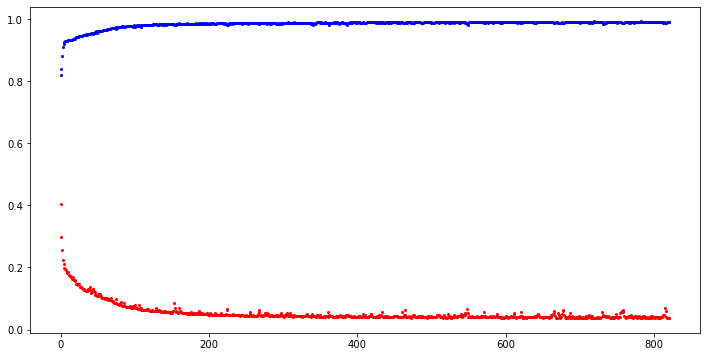

In [23]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,6))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2)
plt.plot(x_len, y_acc, "o", c="blue", markersize=2)

plt.show()